In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
df = pd.read_csv('Deutschland_Cities.csv')
df.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Berlin,52.5167,13.3833,Germany,DE,Berlin,primary,3644826.0,3644826.0
1,Hamburg,53.5500,10.0000,Germany,DE,Hamburg,admin,1841179.0,1841179.0
2,Munich,48.1372,11.5755,Germany,DE,Bavaria,admin,1471508.0,1471508.0
3,Cologne,50.9422,6.9578,Germany,DE,North Rhine-Westphalia,NaN,1085664.0,1085664.0
4,Frankfurt,50.1136,8.6797,Germany,DE,Hesse,minor,753056.0,753056.0


In [3]:
df.drop(['country', 'iso2', 'admin_name', 'population_proper'], axis=1, inplace=True)
df

,city,lat,lng,capital,population
0,Berlin,52.5167,13.3833,primary,3644826.0
1,Hamburg,53.5500,10.0000,admin,1841179.0
2,Munich,48.1372,11.5755,admin,1471508.0
3,Cologne,50.9422,6.9578,NaN,1085664.0
4,Frankfurt,50.1136,8.6797,minor,753056.0
...,...,...,...,...,...
607,Rotenburg,53.0851,9.3879,minor,NaN
608,Karlstadt,49.9603,9.7724,minor,NaN
609,Neustadt,49.5656,8.8437,minor,NaN
610,Homberg,51.0299,9.4026,minor,NaN


In [4]:
df.describe()

,lat,lng,population
count,612.000000,612.000000,6.020000e+02
mean,50.788434,9.350428,7.681314e+04
std,1.623459,2.063536,1.994928e+05
min,47.498500,6.083800,5.312000e+03
25%,49.480400,7.642525,2.608500e+04
50%,50.976700,8.910500,3.620850e+04
75%,51.849600,10.874375,5.887200e+04
max,54.781900,14.987200,3.644826e+06


In [5]:
df.dtypes

city           object
lat           float64
lng           float64
capital        object
population    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        612 non-null    object 
 1   lat         612 non-null    float64
 2   lng         612 non-null    float64
 3   capital     358 non-null    object 
 4   population  602 non-null    float64
dtypes: float64(3), object(2)
memory usage: 24.0+ KB


In [7]:
df.head()

,city,lat,lng,capital,population
0,Berlin,52.5167,13.3833,primary,3644826.0
1,Hamburg,53.5500,10.0000,admin,1841179.0
2,Munich,48.1372,11.5755,admin,1471508.0
3,Cologne,50.9422,6.9578,NaN,1085664.0
4,Frankfurt,50.1136,8.6797,minor,753056.0


In [8]:
df.columns

Index(['city', 'lat', 'lng', 'capital', 'population'], dtype='object')

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

city          0
lat           0
lng           0
capital       0
population    0
dtype: int64

In [11]:
df.isna().any()

city          False
lat           False
lng           False
capital       False
population    False
dtype: bool

In [12]:
plt.style.use("seaborn-dark")

%matplotlib inline

C:\Users\hpt\AppData\Local\Temp\ipykernel_3956\3591918334.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark")


In [13]:
gdf = gpd.read_file('mapshape/DEU_adm2.shp')

In [14]:
df['city'] = np.where(df['capital']=='admin', df.city, '')

In [15]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['lng'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)

C:\Users\hpt\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


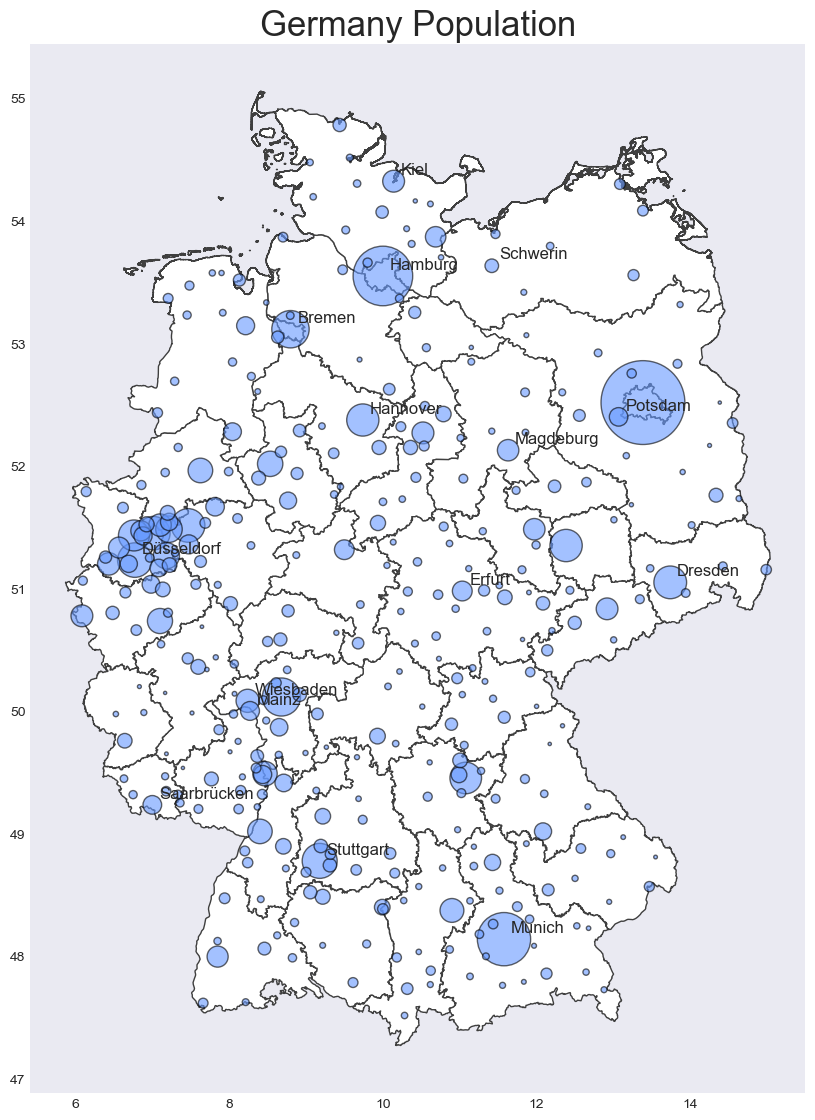

In [16]:
fig, ax = plt.subplots(figsize = (10,30))
gdf.to_crs(epsg=4326)

gdf.plot(ax=ax,color='white', edgecolor='#3f3f3f')
geo_df.plot(ax=ax,color='#6699ff', edgecolor='black', markersize=df['population']/1000, alpha=0.6)


for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, geo_df.city):
        ax.annotate(label, xy=(x, y),fontsize=12, xytext=(5, 5), textcoords="offset points")
ax.set_title('Germany Population',fontsize=25)

plt.show()